# 1. Importing data and helper functions <a class="anchor" id="importing-data"></a>

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
df_wb = pd.read_csv("wellbeing.csv")  # WELLBEING

df_mr = pd.read_csv("material_flow.csv")  # MINERALS

In [3]:
df_wb.head() # head of unfiltered dataset

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals,BASE_PER,Base period
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,PRT,Portugal,10_1,Homicides,DT_10P5HB,Deaths per 100 000 inhabitants,...,0.6,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,PRT,Portugal,10_1,Homicides,DT_10P5HB,Deaths per 100 000 inhabitants,...,0.8,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,PRT,Portugal,10_1,Homicides,DT_10P5HB,Deaths per 100 000 inhabitants,...,0.5,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,PRT,Portugal,10_1,Homicides,DT_10P5HB,Deaths per 100 000 inhabitants,...,0.8,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,PRT,Portugal,10_1,Homicides,DT_10P5HB,Deaths per 100 000 inhabitants,...,0.6,NaN,A,Normal value,0,Units,2,Two,NaN,NaN


In [4]:
df_mr.head()

,Country,Category,Flow name,Flow code,Flow unit,1970,1971,1972,1973,1974,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Biomass,Domestic Extraction,DE,t,29427854.0,28777035.0,27200896.0,29147772.0,30519158.0,...,37406375.0,37961488.0,35542253.0,33625557.0,39501360.0,41190154.0,37576686.0,37891437.0,38353304.0,38628527.0
1,Afghanistan,Biomass,Domestic Material Consumption,DMC,t,29476560.0,29136965.0,27290656.0,29112673.0,30433539.0,...,40423146.0,41655757.0,40992559.0,38552083.0,43433438.0,45294467.0,39730808.0,40083922.0,40596386.0,40905900.0
2,Afghanistan,Biomass,Domestic Material Input,DMI,t,29617873.0,29282898.0,27485608.0,29306247.0,30656605.0,...,40740301.0,42111457.0,41553874.0,39515927.0,44428717.0,46059807.0,40992155.0,41370148.0,41905797.0,42238460.0
3,Afghanistan,Biomass,Exports,EXP,t,141313.0,145933.0,194952.0,193574.0,223066.0,...,317155.0,455700.0,561315.0,963844.0,995279.0,765341.0,1261347.0,1286226.0,1309411.0,1332559.0
4,Afghanistan,Biomass,Imports,IMP,t,190019.0,505863.0,284712.0,158475.0,137447.0,...,3333926.0,4149969.0,6011621.0,5890371.0,4927357.0,4869653.0,3415470.0,3478710.0,3552492.0,3609933.0


In [5]:
# used to print the measurement unit
def find_unit(value):
    conversion = {
        "kt" : 1_000,
        "Mt" : 1_000_000,
        "Gt" : 1_000_000_000
    }
    
    for unit, threshold in reversed(conversion.items()):
        if value >= threshold:
            return unit
    
    return "t"

# function to plot a sub-dataset based on a few parameters
def plot_flow_category(data, flow, category, years, ylabel = False, debug = False):
    years_filter = ["Country"] + [str(y) for y in years] 

    data_filters = (data["Flow name"] == flow) & (data["Category"] == category)

    # Filter for this chart only
    data = data[data_filters][years_filter]

    data = data.dropna()

    maximum_year = str(max(years))
    data = data[data[maximum_year] > 0]

    # Sort descending
    data = data.sort_values(maximum_year, ascending=False)

    data = data.head()

    if debug:
        print(data)
        return    

    melted_df = pd.melt(
        data,
        id_vars=["Country"],
        value_vars=years_filter,
        var_name="Year",
        value_name="Value"
    )

    plot = sb.barplot(
        data=melted_df,
        x="Country",
        y="Value",
        hue="Year",
        palette="viridis"
    )

    plt.xticks(data["Country"], rotation=45)
    plot.yaxis.offsetText.set_visible(False)

    plt.xlabel("Country")
    
    if ylabel:
        plt.ylabel(f"{ylabel}")
    else:
        max_value = max(
            value for col in data.columns for value in data[col] 
            if isinstance(value, (int, float))
        )
        
        plt.ylabel(f"{flow} ({find_unit(max_value)})")  # Use the flow unit from the data

    plt.title(f"{flow} by Country for Selected Years")
    plt.legend(title="Year")

    plt.show()    

# 2. Filtering and cleaning data <a class="anchor" id="cleaning-data"></a>

### 2.1 Dropping unused/duplicate columns and rows

In [6]:
# clearing rows from a dataset matching a given parameter
def remove_rows_from_dataset(rows, df):
    return df[~df["Country"].isin(rows)]

# clearing unused or duplicate columns
def remove_columns_from_dataset(rows, df):
    df = df.drop(columns=[col for col in columns_to_remove if col in df.columns], errors='ignore')
    return df

In [7]:
# removing rows related to continents and organisations, need only countries from the minerals dataset
rows_to_remove = ["World", "Asia + Pacific", "North America", "EECCA", "West Asia", "Africa", "Europe", "Latin America + Caribbean"]
df_mr = remove_rows_from_dataset(rows_to_remove, df_mr)

# removing unused columns
columns_to_remove = ["STRUCTURE", "STRUCTURE_ID", "STRUCTURE_NAME", "ACTION", "REF_AREA", "MEASURE", "UNIT_MEASURE", "Unit of measure", "AGE", "SEX", "EDUCATION_LEV", "DOMAIN", "Time period", "Observation value", "OBS_STATUS", "UNIT_MULT", "Unit multiplier", "Units", "DECIMALS", "Decimals", "Base period"]
df_wb = remove_columns_from_dataset(columns_to_remove, df_wb)

# 3. Queries

### 3.1 Unique values display and global variables stored

In [8]:
# minerals dataset available unique values from Category column
categories = df_mr["Category"].drop_duplicates().values
categories

array(['Biomass', 'Excavated earthen materials (including soil) nec',
       'Fossil fuels', 'Metal ores', 'Mixed and complex products nec.',
       'Non-metallic minerals', 'Products from biomass',
       'Products from fossil fuels', 'Products from metals',
       'Products from non-metallic minerals',
       'Waste for final treatment and disposal'], dtype=object)

In [9]:
# minerals dataset available unique values from Flow name column
flows = df_mr["Flow name"].drop_duplicates().values
flows

array(['Domestic Extraction', 'Domestic Material Consumption',
       'Domestic Material Input', 'Exports', 'Imports',
       'Material Footprint (RMC)', 'Physical Trade Balance',
       'Raw Material Equivalents of exports',
       'Raw Material Equivalents of imports'], dtype=object)

In [10]:
# global variable for storing the selected years
YEARS = [y for y in range(1970, 2025, 27)]

### 3.2 Domestic extraction of fossil fuels for selected years

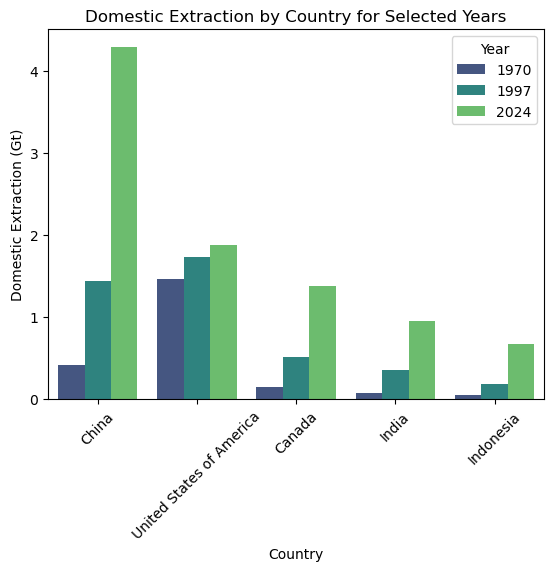

In [11]:
plot_flow_category(df_mr, flow = "Domestic Extraction", category = "Fossil fuels", years = YEARS)

### 3.3 Domestic Extraction of Fossil fuels on world map in 2020

In [12]:
def plot_map(data, flow, category, year):
    shapefile_path = "map/ne_110m_admin_0_countries.shp"  # Might come in handy https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
    world = gpd.read_file(shapefile_path)

    year = str(year)
    years_filter = ["Country", year]

    data_filters = (data["Flow name"] == flow) & (data["Category"] == category)

    # Filter for this chart only
    data = data[data_filters][years_filter]

    data = data.dropna()
    
    world = world.merge(data, how="left", left_on="NAME", right_on="Country")

    # Set up the figure
    fig, ax = plt.subplots(1, 1, figsize=(18, 6))
    
    # Define a colormap using Seaborn
    cmap = sb.color_palette("coolwarm", as_cmap=True)
    
    # Plot the world map with values
    world.plot(column=year, cmap=cmap, linewidth=0.8, edgecolor="black", legend=True, ax=ax)
    
    # Customize plot appearance
    ax.set_title("World Map with Values per Country", fontsize=14)
    ax.axis("off")  # Hide axis
    
    # Show plot
    plt.show()

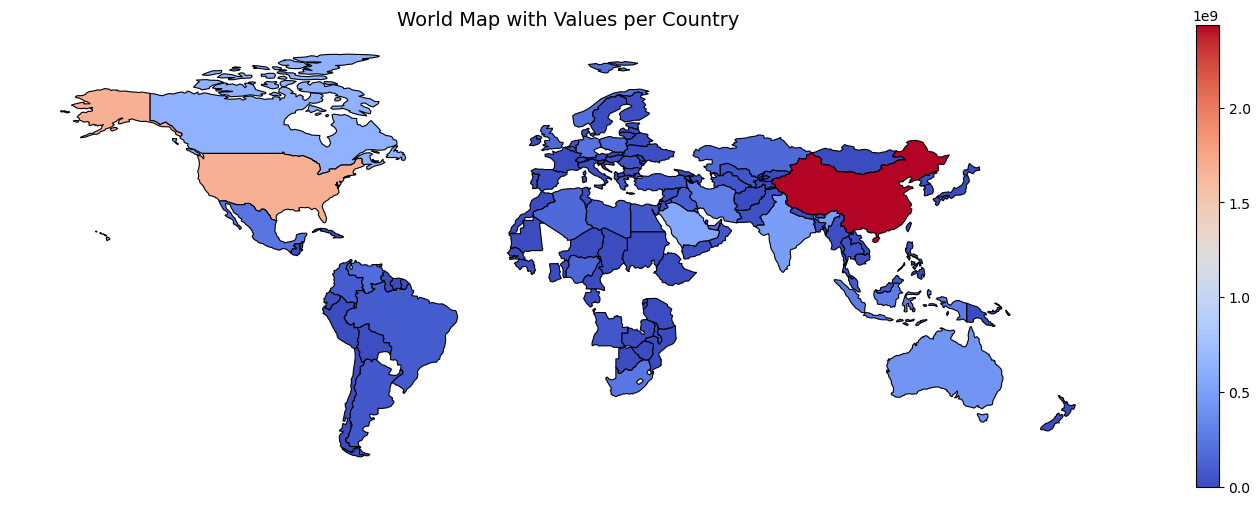

In [13]:
plot_map(df_mr, flow = "Domestic Extraction", category = "Fossil fuels", year = 2005)

In [14]:
# function to filter data from the minerals dataset
def filter_minerals(data, flow_name, category, year = 2023):
    data = data[(data["Category"] == category) & (data["Flow name"] == flow_name)]

    year = str(year)
    data = data[["Country", year]]
    data = data.rename(columns={year: "Minerals"})

    return data
    
# function to filter data from the wellbeing dataset
def filter_wellbeing(data, measure, domain, year = 2023, age = "total", sex = "total", edu = "total"):
    data = data[(data["Measure"] == measure) & (data["Domain"] == domain) & (data["TIME_PERIOD"] == year)]
    
    ''' parameters possible options
    age = total/young/mid/old
    sex = total/male/female
    edu = total/primary/secondary/tertiary
    '''
    
    age = age.capitalize()
    sex = sex.capitalize()
    edu = edu.capitalize()

    # correcting received parameters for ease of use
    if age == "Mid":
        age = "Middle-aged"
    if edu != "Total":
        edu = edu + " education"

    data = data[data["Age"] == age]
    data = data[data["Sex"] == sex]
    data = data[data["Education level"] == edu]
    
    return data

In [15]:
life_satisfaction = filter_wellbeing(df_wb, "Life satisfaction", "Subjective well-being", 2018)
life_satisfaction.head()

,Reference area,Measure,Age,Sex,Education level,Domain,TIME_PERIOD,OBS_VALUE,Observation status,BASE_PER
5846,Colombia,Life satisfaction,Total,Total,Total,Subjective well-being,2018,8.262497,Normal value,NaN
9906,Korea,Life satisfaction,Total,Total,Total,Subjective well-being,2018,6.100000,Definition differs,NaN
11154,Austria,Life satisfaction,Total,Total,Total,Subjective well-being,2018,8.002416,Normal value,NaN
11159,Denmark,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.761102,Normal value,NaN
21251,Poland,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.731018,Normal value,NaN


In [16]:
life_satisfaction.count()

Reference area        34
Measure               34
Age                   34
Sex                   34
Education level       34
Domain                34
TIME_PERIOD           34
OBS_VALUE             34
Observation status    34
BASE_PER               0
dtype: int64

In [17]:
domestic_extraction_fossil_fuels = filter_minerals(df_mr, "Domestic Extraction", "Fossil fuels", 2018)
domestic_extraction_fossil_fuels.head()

,Country,Minerals
14,Afghanistan,2552643.0
156,Albania,1063631.0
227,Algeria,134486514.0
365,Angola,79948312.0
544,Argentina,58800215.0


In [18]:
domestic_extraction_fossil_fuels.count()

Country     142
Minerals    138
dtype: int64

In [19]:
merged1 = life_satisfaction.merge(domestic_extraction_fossil_fuels, left_on='Reference area', right_on='Country')
merged1

,Reference area,Measure,Age,Sex,Education level,Domain,TIME_PERIOD,OBS_VALUE,Observation status,BASE_PER,Country,Minerals
0,Colombia,Life satisfaction,Total,Total,Total,Subjective well-being,2018,8.262497,Normal value,NaN,Colombia,1.454831e+08
1,Austria,Life satisfaction,Total,Total,Total,Subjective well-being,2018,8.002416,Normal value,NaN,Austria,1.407566e+06
2,Denmark,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.761102,Normal value,NaN,Denmark,8.767214e+06
3,Poland,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.731018,Normal value,NaN,Poland,1.258701e+08
4,Canada,Life satisfaction,Total,Total,Total,Subjective well-being,2018,8.100000,Normal value,NaN,Canada,1.219686e+09
5,Netherlands,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.695520,Normal value,NaN,Netherlands,2.438103e+07
6,Slovenia,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.248028,Normal value,NaN,Slovenia,3.228941e+06
7,New Zealand,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.700000,Normal value,NaN,New Zealand,7.590316e+06
8,Norway,Life satisfaction,Total,Total,Total,Subjective well-being,2018,7.980364,Normal value,NaN,Norway,1.732830e+08
9,Hungary,Life satisfaction,Total,Total,Total,Subjective well-being,2018,6.506272,Normal value,NaN,Hungary,1.017654e+07
